In [17]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

In [4]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

No handlers could be found for logger "sklearn.datasets.twenty_newsgroups"


In [15]:
print newsgroups_train.keys(), '\n'

print newsgroups_train['data'][:2], '\n'
print zip(newsgroups_train['target'][:2], newsgroups_train['target_names'][:2])

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target'] 

[u"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n", u"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(newsgroups_train['data'])  # training data matrix (sparse)
y_train = np.array(newsgroups_train['target'])  # target values, want to learn to associate data with these values

print x_train
print y_train

  (0, 56979)	0.0574701540749
  (0, 75358)	0.353835013497
  (0, 123162)	0.259709024574
  (0, 118280)	0.211868072083
  (0, 50527)	0.0546142865886
  (0, 124031)	0.107987951542
  (0, 85354)	0.0369697850882
  (0, 114688)	0.0621407098631
  (0, 111322)	0.019156718025
  (0, 123984)	0.0368542926346
  (0, 37780)	0.381338912595
  (0, 68532)	0.0732581234213
  (0, 114731)	0.144472755128
  (0, 87620)	0.0356718631408
  (0, 95162)	0.0344713840933
  (0, 64095)	0.0354209242713
  (0, 98949)	0.160686060554
  (0, 90379)	0.0199288599566
  (0, 118983)	0.0370859780506
  (0, 89362)	0.065211743063
  (0, 79666)	0.109364012524
  (0, 40998)	0.0780136819692
  (0, 92081)	0.0991327449391
  (0, 76032)	0.0192194630522
  (0, 4605)	0.0633260395248
  :	:
  (11313, 110796)	0.234845394298
  (11313, 106209)	0.101086742479
  (11313, 31386)	0.117663324752
  (11313, 124103)	0.0843568144453
  (11313, 116027)	0.10897891699
  (11313, 33941)	0.0955339923771
  (11313, 107339)	0.117663324752
  (11313, 101950)	0.134564348945
  (11313,

In [22]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

svd = TruncatedSVD()
tsne = TSNE()

In [23]:
x_red = svd.fit_transform(x_train[:5000])
x_red = tsne.fit_transform(x_red)

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_embedding(var_embed, labels):
    c_dict = {idx + 1: val for idx, val in enumerate(newsgroups_train['target_names'])}

    var_x, var_y = var_embed[:, 0], var_embed[:, 1]
    var_x = (var_x - var_x.min()) / (var_x.max() - var_x.min())
    var_y = (var_y - var_y.min()) / (var_y.max() - var_y.min())
    
    plt.figure(figsize=(12, 12))
    norm = plt.Normalize()
    ax = plt.subplot(aspect='equal')
    colors = plt.cm.rainbow(np.linspace(0, 1, len(c_dict)))
    
    for k in c_dict:
        ax.scatter(var_x[labels == k], var_y[labels == k], c=colors[k-1], edgecolors=None, alpha=0.7, label=c_dict[k])
    plt.legend(loc=3)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

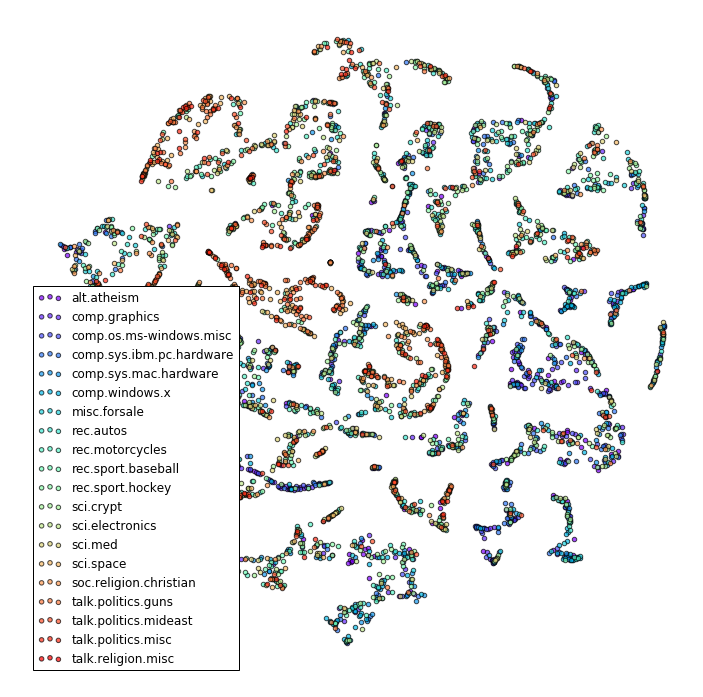

[u'00' u'000' u'0000' ..., u'\xed\xe5littin' u'\xf1austin' u'\xfd\xe9']


In [73]:
plot_embedding(x_red, y_train[:5000])
print np.asarray(vectorizer.get_feature_names())

In [29]:
newsgroups_train['target_names']

(['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 array([7, 4, 4, ..., 3, 1, 8]))